In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from models import ARIMAModel, LSTMModel, split_data
from utils import plot_price_series

warnings.filterwarnings('ignore')

# 1. Load Data
data = pd.read_csv('../data/processed/historical_data.csv', index_col=0, parse_dates=True, header=[0, 1])

# Define tickers
tickers = ['TSLA', 'BND', 'SPY']
close_prices = pd.DataFrame()

for ticker in tickers:
    close_prices[ticker] = data[ticker]['Close']

# Now, this is your forecasting code
forecasts_arima = {}
forecast_period = 365  # 1 year

for ticker in tickers:
    model = ARIMAModel()
    model.optimize_and_fit(close_prices[ticker])
    forecast = model.predict(n_periods=forecast_period)

    # Generate forecast dates
    last_date = close_prices.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period, freq='D')

    forecasts_arima[ticker] = pd.Series(forecast, index=forecast_dates)

print("ARIMA Forecasts completed.")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18784.924, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18780.286, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18779.377, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18779.446, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18779.561, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18780.994, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18780.925, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18782.921, Time=0.93 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=18778.739, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=18780.323, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=18780.264, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18778.808, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=18782.256, Time=0.33 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.561 seconds
Performin

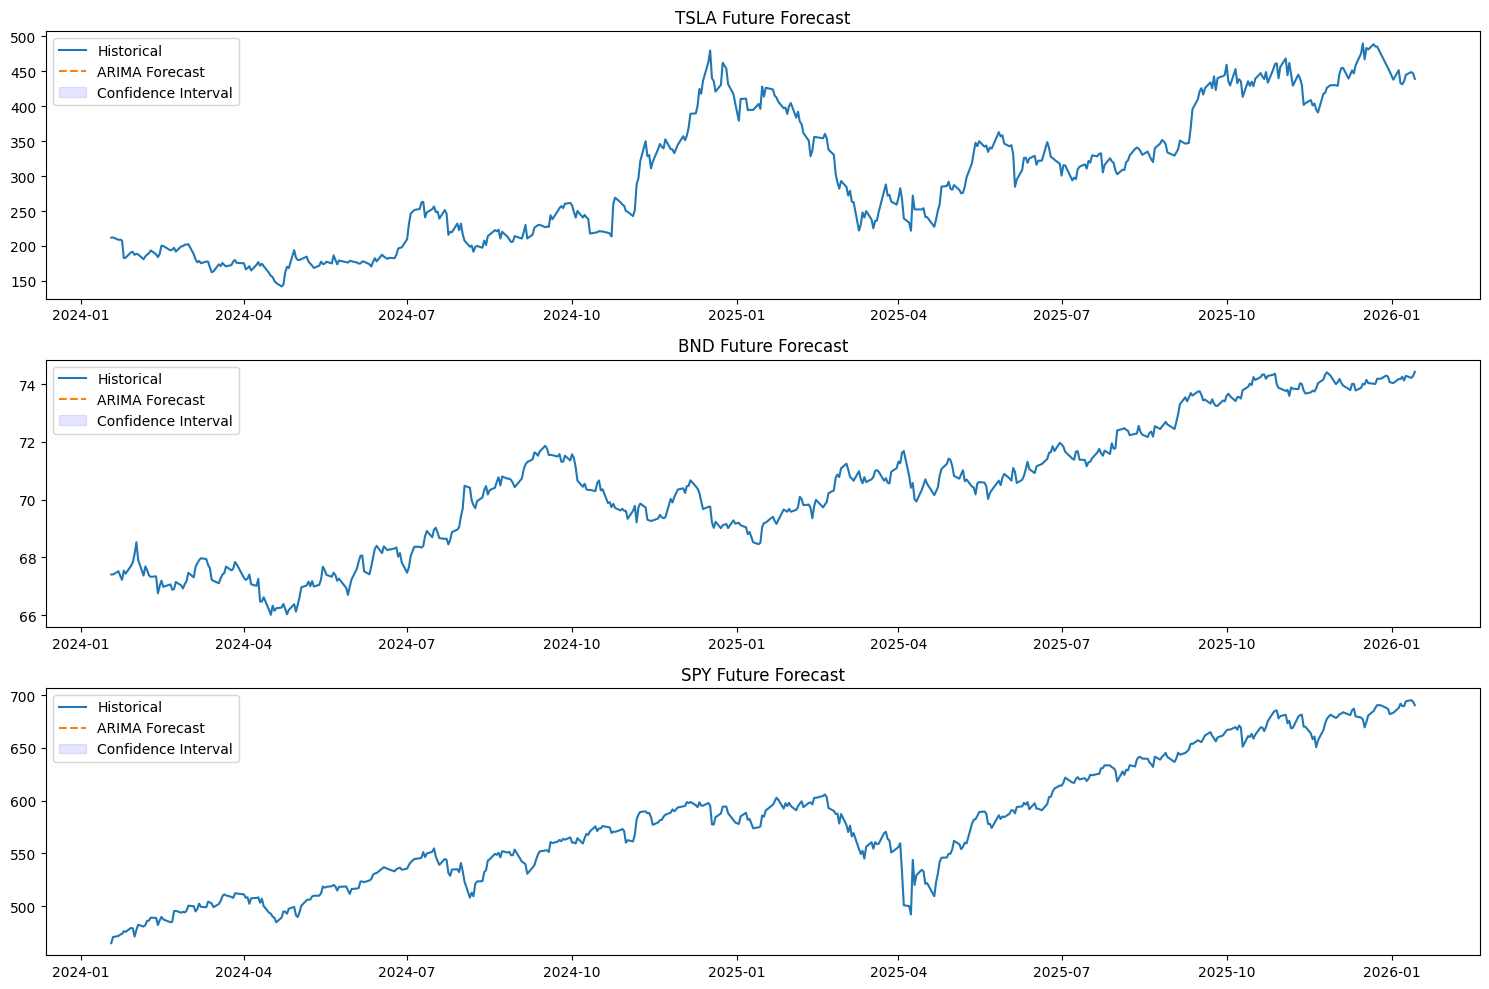

In [3]:
plt.figure(figsize=(15, 10))
for i, ticker in enumerate(tickers):
    plt.subplot(3, 1, i + 1)

    # Plot historical data
    plt.plot(close_prices[ticker].tail(500), label='Historical')

    # Plot ARIMA forecast
    plt.plot(forecasts_arima[ticker], label='ARIMA Forecast', linestyle='--')

    # Add LSTM forecasts (if needed)
    # plt.plot(forecasts_lstm[ticker], label='LSTM Forecast', linestyle='--')

    plt.fill_between(forecasts_arima[ticker].index,
                     forecasts_arima[ticker] * (1 - 0.1),  # Lower bound (e.g., 10% confidence interval)
                     forecasts_arima[ticker] * (1 + 0.1),  # Upper bound
                     color='blue', alpha=0.1, label='Confidence Interval')

    plt.title(f"{ticker} Future Forecast")
    plt.legend()

plt.tight_layout()
plt.show()